In [ ]:
from pathlib import Path

import mudata as mu
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.metrics import f1_score, normalized_mutual_info_score

## Visualize Russell Results

In [53]:
sc.set_figure_params(dpi_save=300, dpi=100, frameon=False)
sc._settings.ScanpyConfig.figdir = Path("../analysis/figures/Figure3")

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


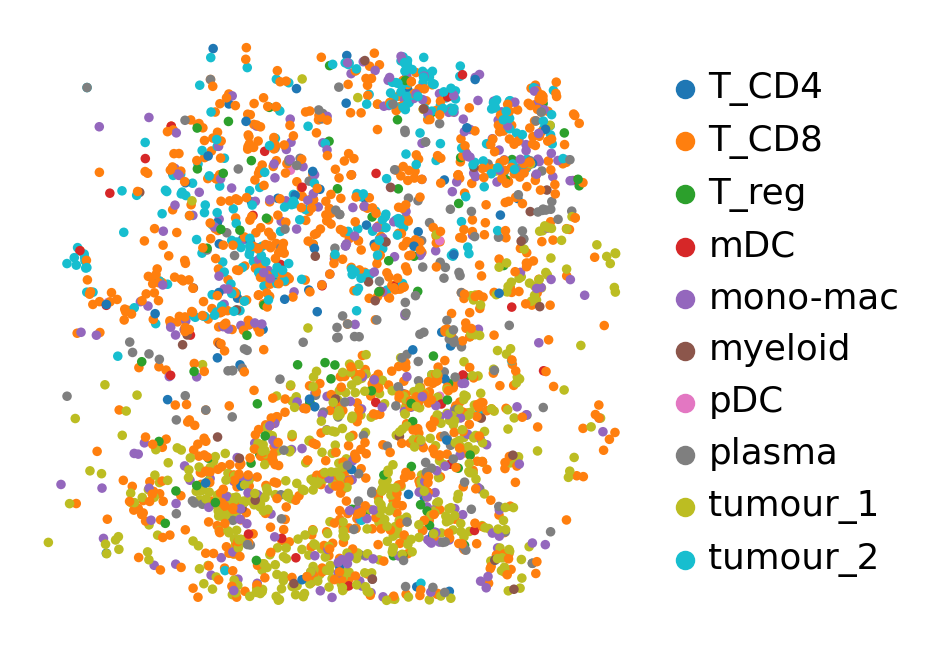

In [ ]:
russell_sc = mu.read_h5mu("/vol/storage/submission_data/data/russel_ref.h5mu")
sc.pl.embedding(russell_sc.mod["atac"], basis="spatial", color="cell_type", title="", save="cells_russell.png")

In [55]:
russell = mu.read_h5mu("/vol/storage/submission_data/data/simulations/russell_250.h5mu")

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [56]:
russell["atac"].obs["spot_id"] = russell["atac"].obs.index

In [ ]:
# Caculate the most probable cluster assignment
max_prob_cluster = np.argmax(russell.mod["atac"].obsm["proportions"], axis=1)
# Get the column names
cluster_id = russell.mod["atac"].uns["proportion_names"]
russell.mod["atac"].obs["ground truth"] = cluster_id[max_prob_cluster]
russell.mod["atac"].obs["ground truth"] = pd.Categorical(
    russell.mod["atac"].obs["ground truth"], categories=russell_sc.mod["atac"].obs.cell_type.cat.categories
)
russell.mod["atac"].uns["ground truth_colors"] = russell_sc.mod["atac"].uns["cell_type_colors"].copy()

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


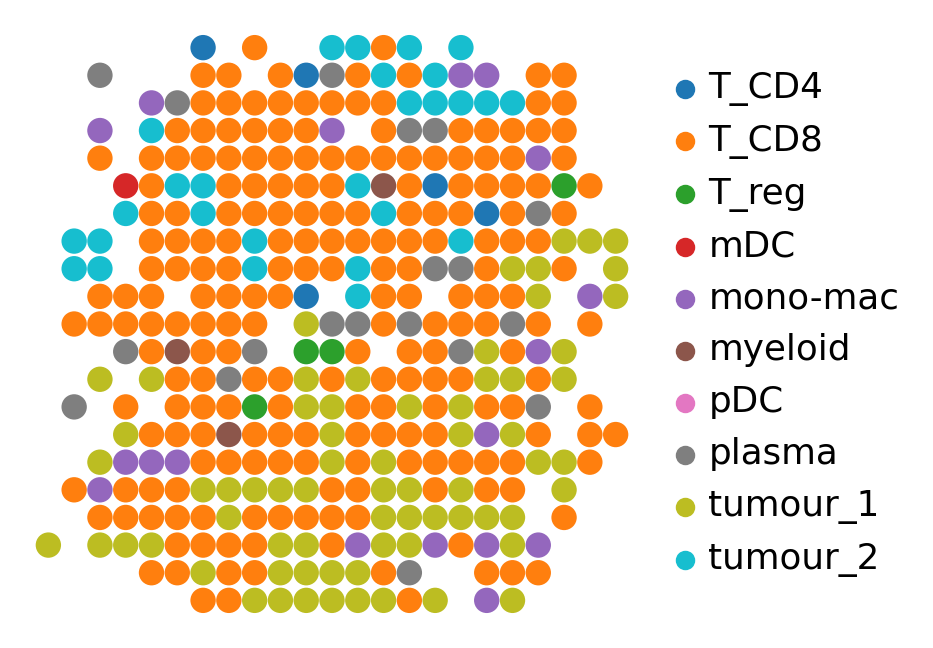

In [ ]:
sc.pl.embedding(russell.mod["atac"], basis="spatial", color="ground truth", save="gt.png", title="")

In [ ]:
def compute_nmi(adata, label_key_true, label_key_method):
    print(label_key_method)
    print(label_key_true)
    true_labels = adata.obs[label_key_true].to_numpy()
    predicted_labels = adata.obs[label_key_method].to_numpy()
    return normalized_mutual_info_score(true_labels, predicted_labels)

In [ ]:
def compute_f1(adata, cell_types, label_key_true, label_key_method):
    results_dict = {}
    print(label_key_method)
    for cell_type in cell_types:
        spot_ids_true = list(adata.obs.loc[adata.obs[label_key_true] == cell_type]["spot_id"])
        spot_ids_method = list(adata.obs.loc[adata.obs[label_key_method] == cell_type]["spot_id"])
        all_spot_ids = np.unique(spot_ids_true + spot_ids_method)
        y_true = adata.obs.iloc[all_spot_ids][[label_key_true]]
        y_pred = adata.obs.iloc[all_spot_ids][[label_key_method]]
        results_dict[cell_type] = f1_score(y_true, y_pred, average="weighted")
    return results_dict

### Cell2Location

In [61]:
russell_atac_ha = "/vol/storage/submission_data/deconvolution_results/cell2location/atac/russell_250_highly_accessible/means_cell_abundance_w_sf.csv"
russell_atac_hv = "/vol/storage/submission_data/deconvolution_results/cell2location/atac/russell_250_highly_variable/means_cell_abundance_w_sf.csv"
russell_rna = "/vol/storage/submission_data/deconvolution_results/cell2location/rna/russell_250_highly_variable/means_cell_abundance_w_sf.csv"
results = [russell_atac_ha, russell_rna, russell_atac_hv]

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


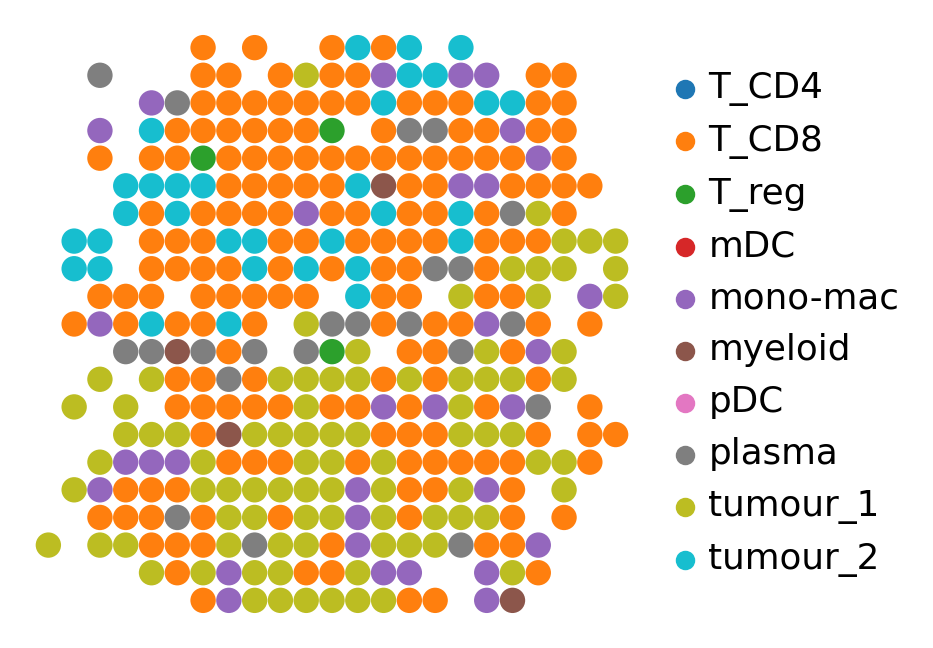

max_prob_cluster_russell_250_highly_accessibleatac
{'T_CD4': 0.0, 'T_reg': 0.1904761904761905, 'mDC': 0.0, 'plasma': 0.5347091932457786, 'mono-mac': 0.28, 'myeloid': 0.6428571428571428}
max_prob_cluster_russell_250_highly_accessibleatac
ground truth
0.4383440935082182


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


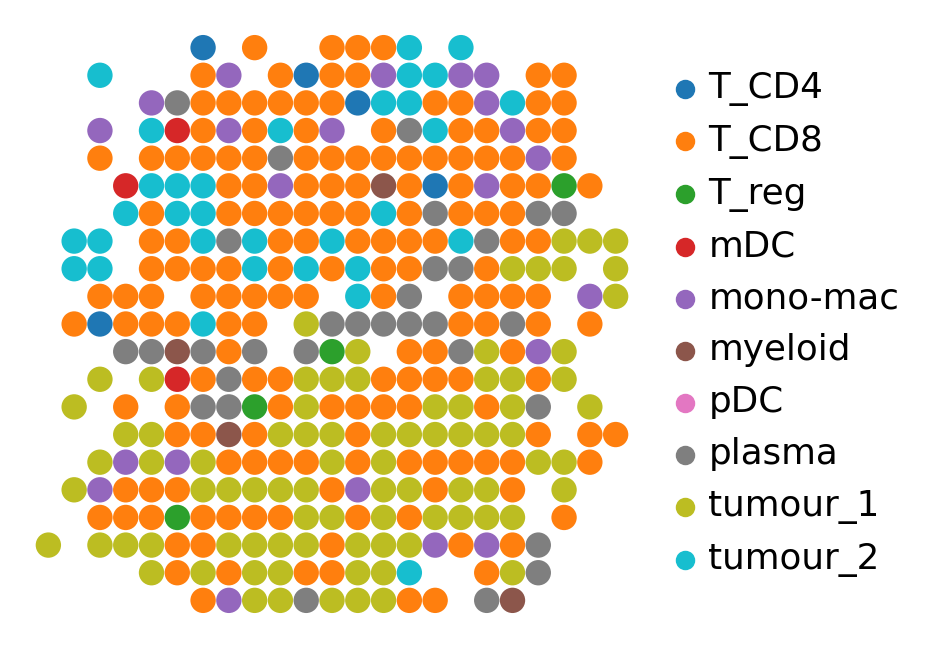

max_prob_cluster_russell_250_highly_variablerna
{'T_CD4': 0.42857142857142855, 'T_reg': 0.6, 'mDC': 0.16666666666666666, 'plasma': 0.29555555555555557, 'mono-mac': 0.43333333333333335, 'myeloid': 0.6428571428571428}
max_prob_cluster_russell_250_highly_variablerna
ground truth
0.462163296096824


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


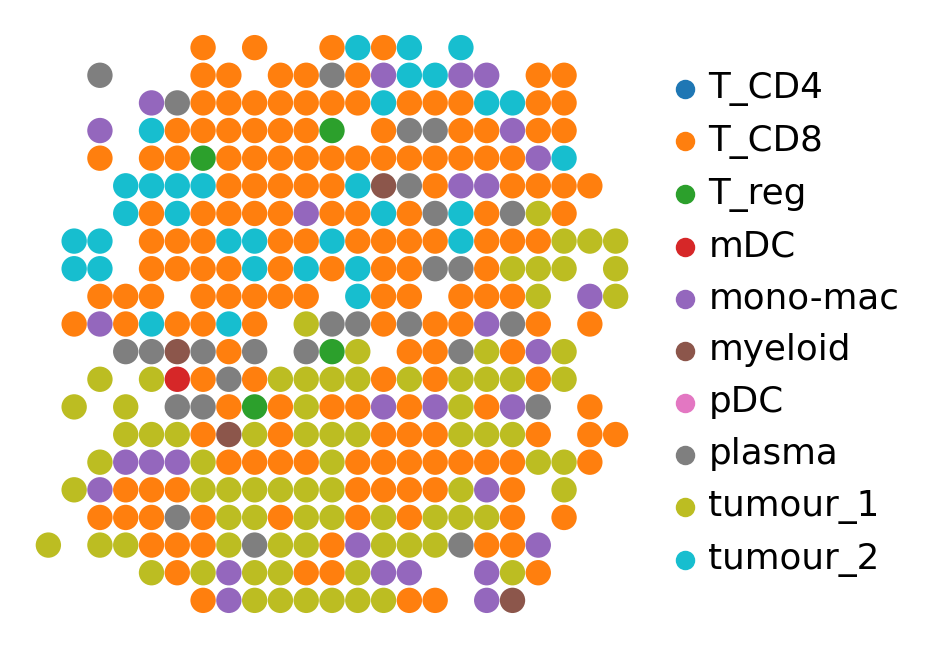

max_prob_cluster_russell_250_highly_variableatac
{'T_CD4': 0.0, 'T_reg': 0.3333333333333333, 'mDC': 0.0, 'plasma': 0.4405797101449275, 'mono-mac': 0.3088235294117647, 'myeloid': 0.6428571428571428}
max_prob_cluster_russell_250_highly_variableatac
ground truth
0.445364047456977


In [ ]:
for result in results:
    dt = pd.read_csv(result, index_col=0)
    dt.columns = dt.columns.str.removeprefix("meanscell_abundance_w_sf_")
    curr = result.split("/")[-2]
    mod = result.split("/")[-3]
    dt.index = russell.obs.index
    russell.obsm[curr] = dt
    # Caculate the most probable cluster assignment
    max_prob_cluster = np.argmax(russell.obsm[curr], axis=1)
    # Get the column names
    cluster_id = dt.columns.to_numpy()
    russell.mod["atac"].obs["max_prob_cluster_" + curr + mod] = cluster_id[max_prob_cluster]
    russell.mod["atac"].obs["max_prob_cluster_" + curr + mod] = pd.Categorical(
        russell.mod["atac"].obs["max_prob_cluster_" + curr + mod],
        categories=russell_sc.mod["atac"].obs.cell_type.cat.categories,
    )
    russell.mod["atac"].uns["max_prob_cluster_" + curr + mod + "_colors"] = (
        russell_sc.mod["atac"].uns["cell_type_colors"].copy()
    )
    sc.pl.embedding(
        russell.mod["atac"],
        basis="spatial",
        color="max_prob_cluster_" + curr + mod,
        save=result.split("/")[-4] + curr + mod + ".png",
        title="",
    )
    print(
        compute_f1(
            russell.mod["atac"],
            ["T_CD4", "T_reg", "mDC", "plasma", "mono-mac", "myeloid"],
            "ground truth",
            "max_prob_cluster_" + curr + mod,
        )
    )
    print(
        compute_nmi(
            adata=russell.mod["atac"], label_key_true="ground truth", label_key_method="max_prob_cluster_" + curr + mod
        )
    )

### RCTD

In [ ]:
russell_atac_ha = "/vol/storage/submission_data/deconvolution_results/rctd/atac/russell_250_highly_accessible/estimated_proportions.csv"
russell_atac_hv = (
    "/vol/storage/submission_data/deconvolution_results/rctd/atac/russell_250_highly_variable/estimated_proportions.csv"
)
russell_rna = (
    "/vol/storage/submission_data/deconvolution_results/rctd/rna/russell_250_highly_variable/estimated_proportions.csv"
)
results = [russell_atac_ha, russell_rna, russell_atac_hv]

Index(['T_CD4', 'T_CD8', 'T_reg', 'mDC', 'mono-mac', 'myeloid', 'pDC',
       'plasma', 'tumour_1', 'tumour_2'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


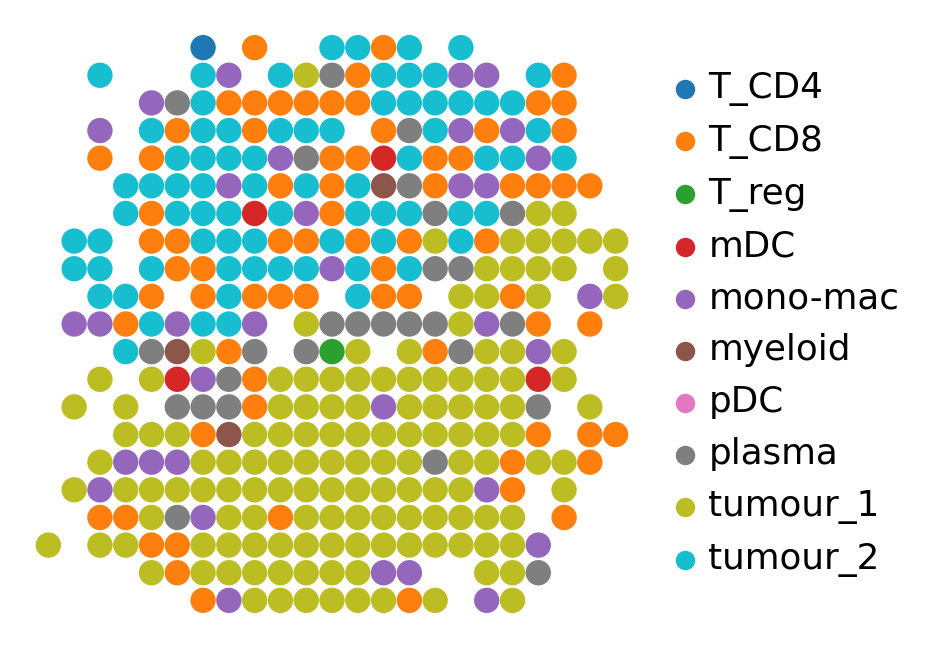

max_prob_cluster_russell_250_highly_accessible_rctdatac
{'T_CD4': 0.33333333333333337, 'T_reg': 0.4, 'mDC': 0.0, 'plasma': 0.32542819499341236, 'mono-mac': 0.23076923076923073, 'myeloid': 1.0}
max_prob_cluster_russell_250_highly_accessible_rctdatac
ground truth
0.3698779465558152
Index(['T_CD4', 'T_CD8', 'T_reg', 'mDC', 'mono-mac', 'myeloid', 'pDC',
       'plasma', 'tumour_1', 'tumour_2'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


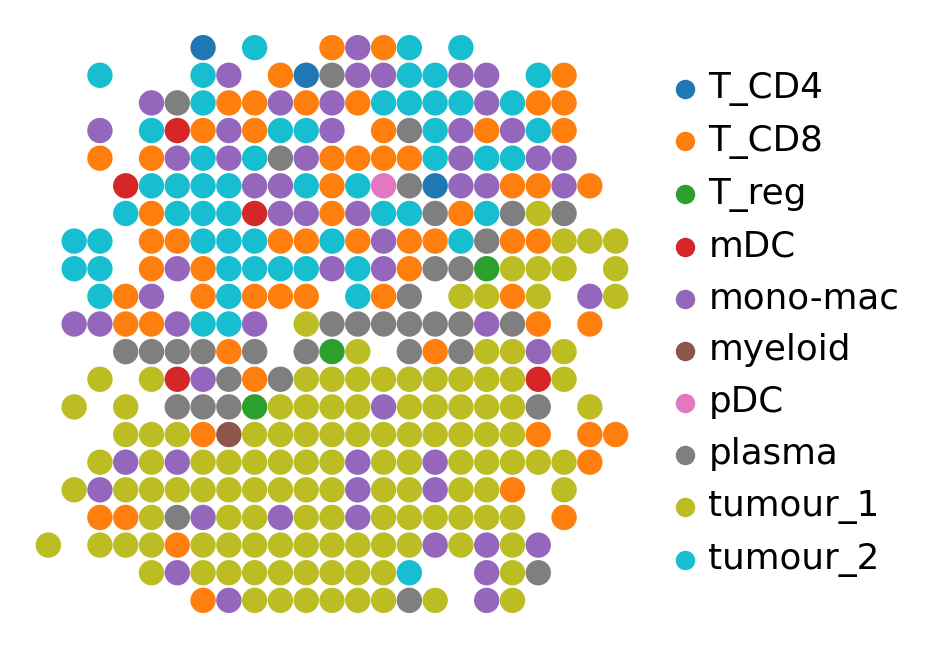

max_prob_cluster_russell_250_highly_variable_rctdrna
{'T_CD4': 0.7499999999999999, 'T_reg': 0.4571428571428572, 'mDC': 0.06666666666666668, 'plasma': 0.235920177383592, 'mono-mac': 0.10989010989010987, 'myeloid': 0.5}
max_prob_cluster_russell_250_highly_variable_rctdrna
ground truth
0.38592533220242325
Index(['T_CD4', 'T_CD8', 'T_reg', 'mDC', 'mono-mac', 'myeloid', 'pDC',
       'plasma', 'tumour_1', 'tumour_2'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


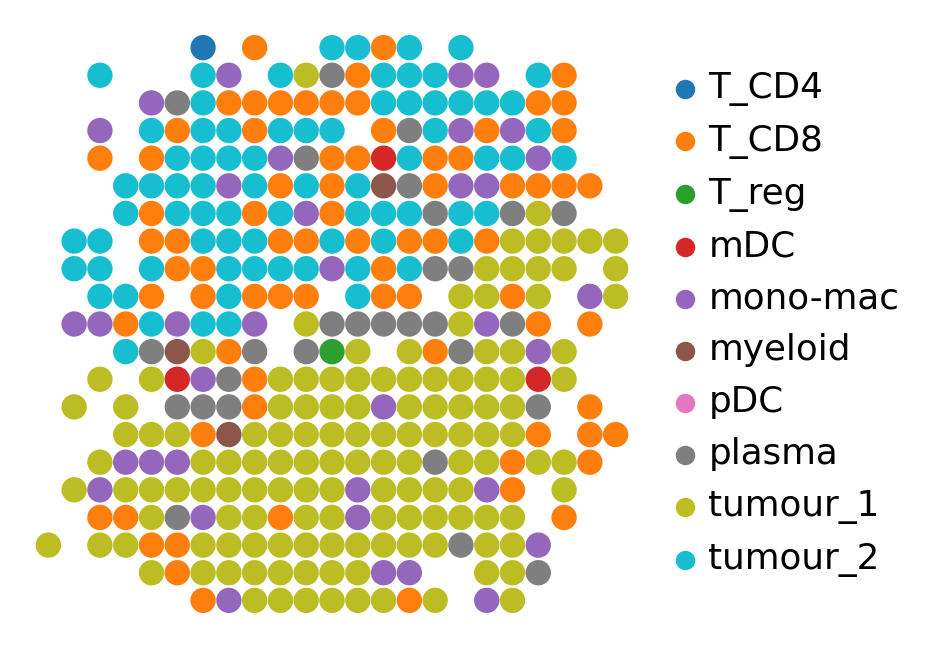

max_prob_cluster_russell_250_highly_variable_rctdatac
{'T_CD4': 0.33333333333333337, 'T_reg': 0.4, 'mDC': 0.0, 'plasma': 0.29404761904761906, 'mono-mac': 0.21138211382113825, 'myeloid': 1.0}
max_prob_cluster_russell_250_highly_variable_rctdatac
ground truth
0.3724587413587231


In [ ]:
for result in results:
    dt = pd.read_csv(result, index_col=0)
    print(dt.columns)
    curr = result.split("/")[-2] + "_rctd"
    mod = result.split("/")[-3]
    dt.index = russell.obs.index
    russell.obsm[curr] = dt
    # Caculate the most probable cluster assignment
    max_prob_cluster = np.argmax(russell.obsm[curr], axis=1)
    # Get the column names
    cluster_id = dt.columns.to_numpy()
    russell.mod["atac"].obs["max_prob_cluster_" + curr + mod] = cluster_id[max_prob_cluster]
    russell.mod["atac"].obs["max_prob_cluster_" + curr + mod] = pd.Categorical(
        russell.mod["atac"].obs["max_prob_cluster_" + curr + mod],
        categories=russell_sc.mod["atac"].obs.cell_type.cat.categories,
    )
    russell.mod["atac"].uns["max_prob_cluster_" + curr + mod + "_colors"] = (
        russell_sc.mod["atac"].uns["cell_type_colors"].copy()
    )
    sc.pl.embedding(
        russell.mod["atac"],
        basis="spatial",
        color="max_prob_cluster_" + curr + mod,
        save=result.split("/")[-4] + curr + mod + ".png",
        title="",
    )
    print(
        compute_f1(
            russell.mod["atac"],
            ["T_CD4", "T_reg", "mDC", "plasma", "mono-mac", "myeloid"],
            "ground truth",
            "max_prob_cluster_" + curr + mod,
        )
    )
    print(
        compute_nmi(
            adata=russell.mod["atac"], label_key_true="ground truth", label_key_method="max_prob_cluster_" + curr + mod
        )
    )

### Tangram

In [71]:
russell_atac_ha = (
    "/vol/storage/submission_data/deconvolution_results/tangram/atac/russell_250_highly_accessible/tangram_ct_pred.csv"
)
russell_atac_hv = (
    "/vol/storage/submission_data/deconvolution_results/tangram/atac/russell_250_highly_variable/tangram_ct_pred.csv"
)
russell_rna = (
    "/vol/storage/submission_data/deconvolution_results/tangram/rna/russell_250_highly_variable/tangram_ct_pred.csv"
)
results = [russell_atac_ha, russell_rna, russell_atac_hv]

Index(['T_reg', 'mono-mac', 'T_CD8', 'tumour_2', 'tumour_1', 'T_CD4', 'plasma',
       'pDC', 'mDC', 'myeloid'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


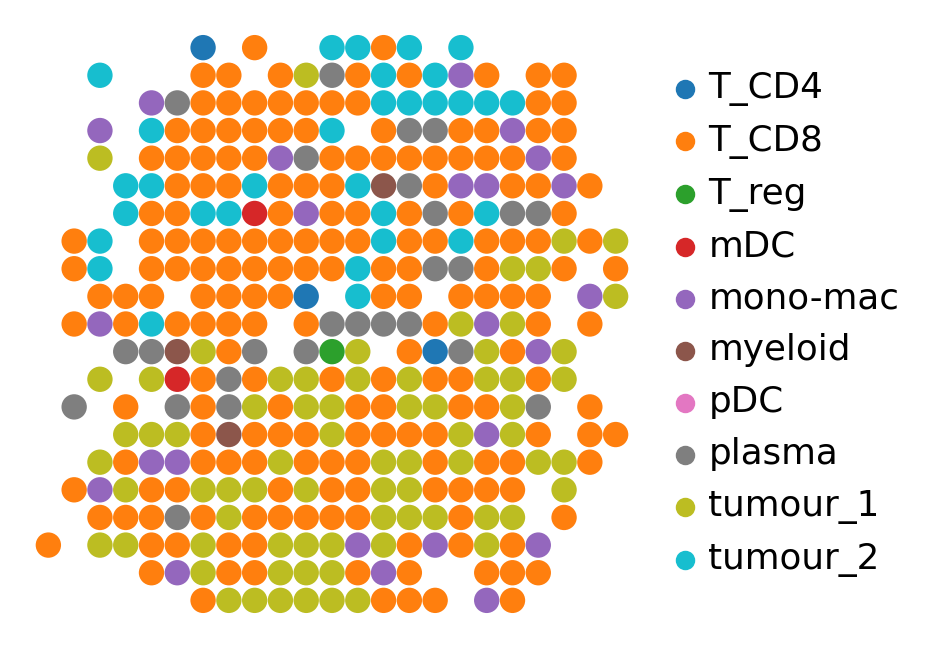

max_prob_cluster_russell_250_highly_accessible_tangramatac
{'T_CD4': 0.4166666666666667, 'T_reg': 0.4, 'mDC': 0.0, 'plasma': 0.46590038314176246, 'mono-mac': 0.42857142857142855, 'myeloid': 1.0}
max_prob_cluster_russell_250_highly_accessible_tangramatac
ground truth
0.46925518130485205
Index(['T_reg', 'mono-mac', 'T_CD8', 'tumour_2', 'tumour_1', 'T_CD4', 'plasma',
       'pDC', 'mDC', 'myeloid'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


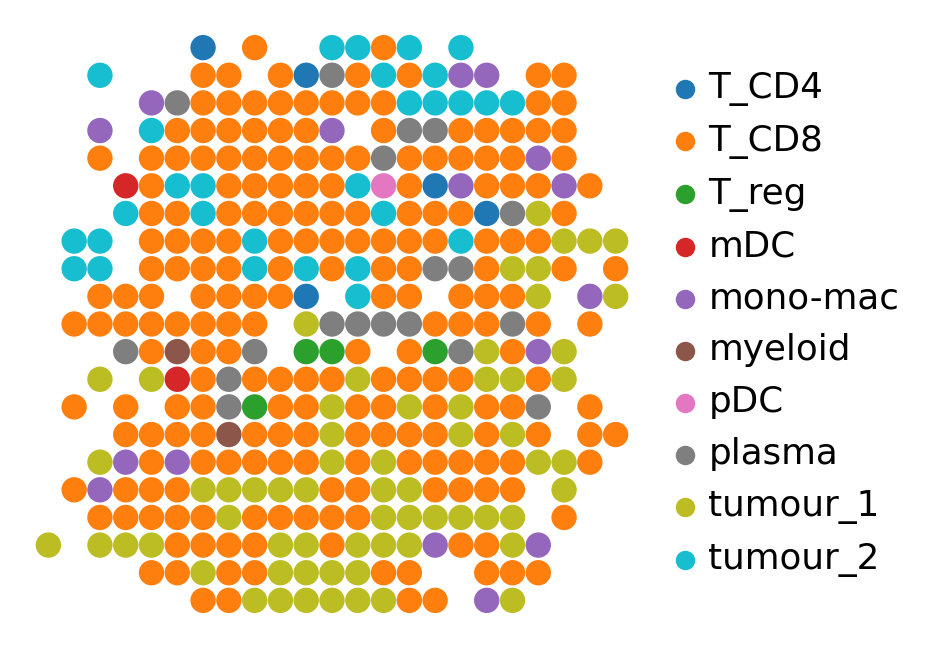

max_prob_cluster_russell_250_highly_variable_tangramrna
{'T_CD4': 1.0, 'T_reg': 0.6, 'mDC': 0.3333333333333333, 'plasma': 0.6521739130434783, 'mono-mac': 0.7411764705882353, 'myeloid': 0.8000000000000002}
max_prob_cluster_russell_250_highly_variable_tangramrna
ground truth
0.7960739816776501
Index(['T_reg', 'mono-mac', 'T_CD8', 'tumour_2', 'tumour_1', 'T_CD4', 'plasma',
       'pDC', 'mDC', 'myeloid'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


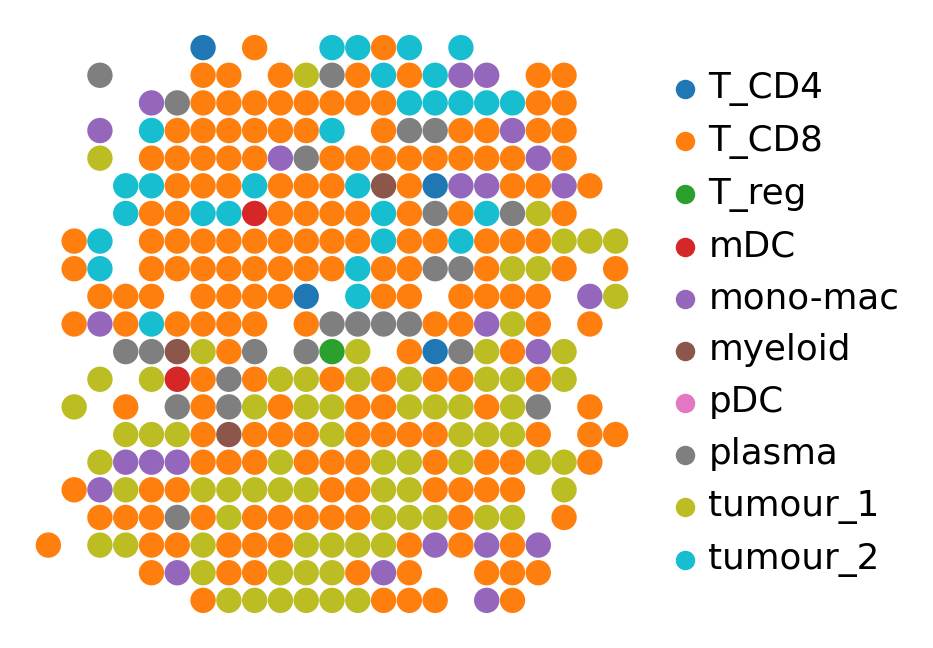

max_prob_cluster_russell_250_highly_variable_tangramatac
{'T_CD4': 0.5555555555555555, 'T_reg': 0.4, 'mDC': 0.0, 'plasma': 0.473421926910299, 'mono-mac': 0.4761904761904762, 'myeloid': 1.0}
max_prob_cluster_russell_250_highly_variable_tangramatac
ground truth
0.5097897958509887


In [73]:
for result in results:
    dt = pd.read_csv(result, index_col=0)
    print(dt.columns)
    curr = result.split("/")[-2] + "_tangram"
    mod = result.split("/")[-3]
    dt.index = russell.obs.index
    russell.obsm[curr] = dt
    # Caculate the most probable cluster assignment
    max_prob_cluster = np.argmax(russell.obsm[curr], axis=1)
    # Get the column names
    cluster_id = dt.columns.to_numpy()
    russell.mod["atac"].obs["max_prob_cluster_" + curr + mod] = cluster_id[max_prob_cluster]
    russell.mod["atac"].obs["max_prob_cluster_" + curr + mod] = pd.Categorical(
        russell.mod["atac"].obs["max_prob_cluster_" + curr + mod],
        categories=russell_sc.mod["atac"].obs.cell_type.cat.categories,
    )
    russell.mod["atac"].uns["max_prob_cluster_" + curr + mod + "_colors"] = (
        russell_sc.mod["atac"].uns["cell_type_colors"].copy()
    )
    sc.pl.embedding(
        russell.mod["atac"],
        basis="spatial",
        color="max_prob_cluster_" + curr + mod,
        save=result.split("/")[-4] + curr + mod + ".png",
        title="",
    )
    print(
        compute_f1(
            russell.mod["atac"],
            ["T_CD4", "T_reg", "mDC", "plasma", "mono-mac", "myeloid"],
            "ground truth",
            "max_prob_cluster_" + curr + mod,
        )
    )
    print(
        compute_nmi(
            adata=russell.mod["atac"], label_key_true="ground truth", label_key_method="max_prob_cluster_" + curr + mod
        )
    )